一.计算感受野

计算一下之前复现过的LeNet5以及AlexNet各层的感受野大小

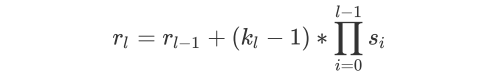

一.计算LeNet5感受野

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_receptive_field import receptive_field

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        # 第一层卷积：输入1通道（灰度图），输出6通道，5×5卷积核（无padding，stride默认1）
        self.conv1 = nn.Conv2d(1, 6, 5)#r0=s0=1,r1=1+(5-1)*(1)=5
        # 最大池化：2×2核，步长2（符合库要求，且是LeNet5标准设计）
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)#r1=5,r2=5+(2-1)*(1*1)=6
        # 第二层卷积：输入6通道，输出16通道，5×5卷积核 
        self.conv2 = nn.Conv2d(6, 16, 5)#r2=6,r3=6+(5-1)*(2*1*1)=14
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)#r3=14,r4=14+(2-1)*(1*2*1*1)=16
        # 全连接层暂不定义（符合库"不参与感受野计算"的要求）
        # self.fc1 = nn.Linear(16*5*5, 120) 
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)  # LeNet5原输出10类（MNIST）

    def forward(self, x):
        # 卷积1 → tanh激活 → 池化1
        x = F.tanh(self.conv1(x))
        x = self.pool1(x)
        # 卷积2 → tanh激活 → 池化2
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)
        # 仅返回卷积池化后的特征图（用于感受野计算，无需展平或softmax）
        return x

# 实例化模型

net = LeNet5().cuda()
# 计算感受野：输入形状为(通道数, 高度, 宽度)，即(1, 32, 32)（LeNet5标准输入）
receptive_field_dict = receptive_field(net, input_size=(1, 32, 32))

------------------------------------------------------------------------------
        Layer (type)    map size      start       jump receptive_field 
        0               [32, 32]        0.5        1.0             1.0 
        1               [28, 28]        2.5        1.0             5.0 
        2               [14, 14]        3.0        2.0             6.0 
        3               [10, 10]        7.0        2.0            14.0 
        4                 [5, 5]        8.0        4.0            16.0 


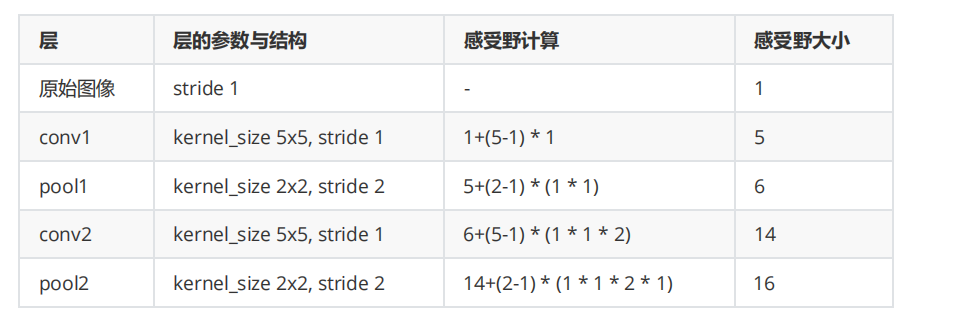